# This is due 27 October 2024

Suppose that consumption growth has lognormal distribution with the possibility of rare disasters:

ln(g) = 0.02 + 0.02ε + ν

Here ε is a standard normal random variable, while ν is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

Simulate ε with (at least) 10e4 random draws from standard normal distribution, and simulate ν with (at least) 10e4 random draws from standard uniform distribution.

Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility:

M = 0.99g ** -γ

Repeat this process for values of γ in the range from 1 to 4, in increments of 0.1 (or less). (Note that you can reuse the same simulated distribution of consumption growth for all values of γ). 

 - Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

 - Find the smallest value of γ (in your data) for which σM/μM > 0.4. Explain (in words, without using any mathematical  equations or formulas) the economic significance of this result.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# initialize variables
n_simulations = 100000

In [4]:
random_epsilon = np.random.normal(0, 1)

In [5]:
random_nu = np.random.uniform(0, 1)

In [6]:
def consumption_growth (epsilon, nu):
    growth = np.exp(0.02 + 0.02*epsilon + nu)
    return growth


In [7]:
def pricing_kernel (growth, gamma):
    return 0.99*growth**(-gamma)

In [8]:
columns = ["epsilon",
           "nu",
           "growth",]

In [9]:
# Create dataframe to store simulation results

Simulation_df = pd.DataFrame(index=range(n_simulations), columns=columns)

Simulation_df["epsilon"] = np.random.normal(0, 1, (n_simulations))

Simulation_df["nu_draw"] = np.random.uniform(0, 1, (n_simulations))

Simulation_df["nu"] = np.where(Simulation_df["nu_draw"] <= 0.017, np.log(0.65), 0)

Simulation_df["growth"] = consumption_growth (Simulation_df["epsilon"], Simulation_df["nu"])


In [10]:
Simulation_df

,epsilon,nu,growth,nu_draw
0,-0.694680,0.0,1.006125,0.601615
1,0.950326,0.0,1.039777,0.045705
2,0.981016,0.0,1.040416,0.079656
3,-1.198494,0.0,0.996038,0.492857
4,1.557572,0.0,1.052482,0.595747
...,...,...,...,...
99995,1.314247,0.0,1.047373,0.893707
99996,0.792299,0.0,1.036496,0.585640
99997,-1.314023,0.0,0.993739,0.056421
99998,0.928657,0.0,1.039327,0.504250


In [11]:
gamma_range = np.arange(1, 4.1, 0.1)
gamma_range

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. ])

In [12]:
Pricing_Kernel_df = pd.DataFrame(index=range(n_simulations), columns=gamma_range)

for gamma in gamma_range:
    Pricing_Kernel_df.loc[:,gamma] = pricing_kernel (Simulation_df["growth"], gamma)

In [13]:
Pricing_Kernel_df

,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0
0,0.983973,0.983372,0.982772,0.982172,0.981573,0.980973,0.980375,0.979776,0.979178,0.97858,...,0.971436,0.970843,0.97025,0.969658,0.969066,0.968474,0.967883,0.967292,0.966702,0.966112
1,0.952127,0.94842,0.944728,0.94105,0.937387,0.933737,0.930102,0.926481,0.922874,0.919282,...,0.877244,0.873828,0.870427,0.867038,0.863663,0.8603,0.856951,0.853615,0.850292,0.846981
2,0.951543,0.94778,0.944032,0.9403,0.936581,0.932878,0.929189,0.925515,0.921855,0.91821,...,0.875576,0.872114,0.868665,0.86523,0.861809,0.858401,0.855007,0.851626,0.848259,0.844905
3,0.993938,0.994333,0.994727,0.995122,0.995518,0.995913,0.996308,0.996704,0.9971,0.997496,...,1.002259,1.002657,1.003055,1.003453,1.003852,1.00425,1.004649,1.005048,1.005447,1.005846
4,0.940633,0.935834,0.93106,0.926309,0.921583,0.916881,0.912203,0.907549,0.902919,0.898312,...,0.84483,0.84052,0.836231,0.831965,0.82772,0.823497,0.819295,0.815115,0.810956,0.806819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.945222,0.940857,0.936513,0.932188,0.927883,0.923599,0.919334,0.915088,0.910863,0.906656,...,0.857672,0.853711,0.849769,0.845845,0.841939,0.838051,0.834181,0.830329,0.826495,0.822678
99996,0.955141,0.951723,0.948318,0.944925,0.941544,0.938175,0.934818,0.931473,0.92814,0.924819,...,0.885881,0.882711,0.879552,0.876405,0.873269,0.870145,0.867031,0.863929,0.860837,0.857757
99997,0.996237,0.996863,0.997489,0.998116,0.998743,0.999371,0.999998,1.000627,1.001255,1.001884,...,1.009464,1.010098,1.010732,1.011367,1.012003,1.012638,1.013275,1.013911,1.014548,1.015186
99998,0.95254,0.948873,0.94522,0.941581,0.937956,0.934345,0.930747,0.927164,0.923595,0.920039,...,0.878423,0.875041,0.871672,0.868317,0.864974,0.861644,0.858326,0.855022,0.85173,0.848451


In [14]:
Pricing_Kernel_transposed_df = Pricing_Kernel_df.T

In [15]:
Pricing_Kernel_transposed_df["mean"]=Pricing_Kernel_transposed_df.mean(axis=1)
Pricing_Kernel_transposed_df["std"]=Pricing_Kernel_transposed_df.std(axis=1)
Pricing_Kernel_transposed_df["volatility_ratio"]=Pricing_Kernel_transposed_df["std"]/Pricing_Kernel_transposed_df["mean"]

In [16]:
Pricing_Kernel_transposed_df

,0,1,2,3,4,5,6,7,8,9,...,99993,99994,99995,99996,99997,99998,99999,mean,std,volatility_ratio
1.0,0.983973,0.952127,0.951543,0.993938,0.940633,0.961586,0.952791,0.9432,0.985355,0.956333,...,0.958349,0.959538,0.945222,0.955141,0.996237,0.95254,0.994842,0.979465,0.070099,0.071568
1.1,0.983372,0.94842,0.94778,0.994333,0.935834,0.95879,0.949148,0.938644,0.984891,0.95303,...,0.95524,0.956544,0.940857,0.951723,0.996863,0.948873,0.995327,0.978662,0.078635,0.080349
1.2,0.982772,0.944728,0.944032,0.994727,0.93106,0.956002,0.945519,0.934109,0.984428,0.949739,...,0.952141,0.953559,0.936513,0.948318,0.997489,0.94522,0.995813,0.97791,0.0875,0.089477
1.3,0.982172,0.94105,0.9403,0.995122,0.926309,0.953222,0.941904,0.929597,0.983966,0.946458,...,0.949052,0.950584,0.932188,0.944925,0.998116,0.941581,0.996299,0.977212,0.096711,0.098966
1.4,0.981573,0.937387,0.936581,0.995518,0.921583,0.95045,0.938302,0.925106,0.983503,0.943189,...,0.945973,0.947618,0.927883,0.941544,0.998743,0.937956,0.996785,0.97657,0.106281,0.108831
1.5,0.980973,0.933737,0.932878,0.995913,0.916881,0.947686,0.934715,0.920637,0.98304,0.939932,...,0.942905,0.944661,0.923599,0.938175,0.999371,0.934345,0.997271,0.975986,0.116228,0.119088
1.6,0.980375,0.930102,0.929189,0.996308,0.912203,0.94493,0.931141,0.916189,0.982578,0.936685,...,0.939846,0.941713,0.919334,0.934818,0.999998,0.930747,0.997758,0.975461,0.126568,0.129752
1.7,0.979776,0.926481,0.925515,0.996704,0.907549,0.942183,0.92758,0.911763,0.982116,0.93345,...,0.936797,0.938775,0.915088,0.931473,1.000627,0.927164,0.998245,0.974999,0.137319,0.14084
1.8,0.979178,0.922874,0.921855,0.9971,0.902919,0.939443,0.924034,0.907358,0.981654,0.930226,...,0.933758,0.935845,0.910863,0.92814,1.001255,0.923595,0.998732,0.9746,0.148498,0.152368
1.9,0.97858,0.919282,0.91821,0.997496,0.898312,0.936711,0.9205,0.902975,0.981193,0.927013,...,0.930729,0.932925,0.906656,0.924819,1.001884,0.920039,0.999219,0.974269,0.160125,0.164355


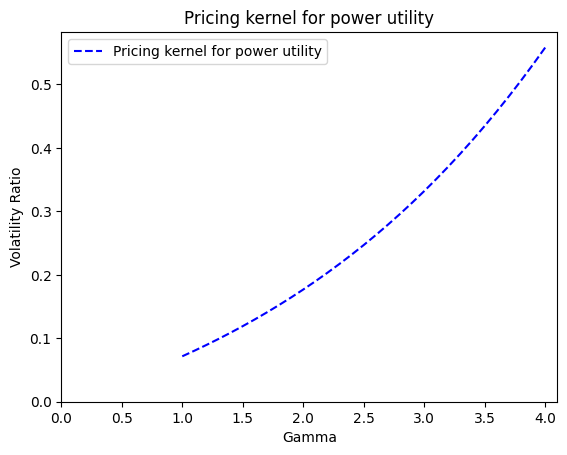

In [17]:
plt.plot( Pricing_Kernel_transposed_df.index, 
         Pricing_Kernel_transposed_df["volatility_ratio"],
         color='blue', 
         linestyle='--', 
         label = "Pricing kernel for power utility")


plt.yticks(np.arange(0, 0.6, 0.1))
plt.xlim(0,4.1)
plt.xlabel('Gamma')
plt.ylabel('Volatility Ratio')
plt.title('Pricing kernel for power utility')
plt.legend()
plt.show()

### Smallest value of γ for which σM/μM > 0.4

In [18]:
# Filter the DataFrame where 'volatility_ratio' > 0.4
filtered_df = Pricing_Kernel_transposed_df[Pricing_Kernel_transposed_df["volatility_ratio"] > 0.4]

# Get the index of the minimum value from the filtered DataFrame
min_index = filtered_df["volatility_ratio"].idxmin()

# Print the formatted index
print(f"Smallest value of  γ for which σM/μM > 0.4: {min_index:.1f}")

Smallest value of  γ for which σM/μM > 0.4: 3.4


According to the Hansen–Jagannathan (H–J) bound, the volatility ratio of pricing kernel cannot be less than the highest sharpe ratio of all possible portfolios.  Considering that the US stock market has a Sharpe ratio of around 0.4, from the Hansen-Jagannthan bound, the volatility ratio (σM/μM) has to be equal to or higher than 0.4 as well, which leads to a minimum gamma value of 3.4. 

 As gamma is the constant coefficient of investor's risk aversion for an investor with power utility of consumption, the economic significance of a gamma value of 3.4 is that assuming that consumption growth grows at 2% a year, the standard deviation of consumption growth is also 2%, disasters happen with a probability of 1.7% and when disasters occur, 35% of optimal consumption is lost, an investor with power utility of consumption should have a risk aversion of 3.4. Accordingly, there is no equity premium puzzle as 3.4 is a reasonable degree of risk aversion.

The possiblity of rare disasters (1.7% chance of happening in any given year), greatly increases volatility and negative (left) skewness of consumption growth and so gamma is much smaller compared with a model that does not take into account the possibility of rare disasters.

Still, σM/μM > 0.4 would mean that the pricing kernel is very volatile, as the value of the standard deviation of the pricing kernel is more than 40% that of the mean value of the pricing kernel.

Accordingly, the intertemporal marginal rate of substitution, which acts as a pricing kernel (or stochastic discount factor) that relates price to final value would also be volatile.


# Version 2

In [19]:
def MPAP(simulation):
    #Value of consumption growth
    list_g = []
    for i in range(simulation):
        eps = np.random.normal()
        rand_nu = np.random.uniform()
        if rand_nu <= 0.017:
            nu = np.log(0.65)
        else:
            nu = 0 #check the function of nu
        rand_g = np.exp(0.02 + 0.02 * eps + nu)
        list_g.append(rand_g)
    g = np.array(list_g)
    
    #Hansen-Jagannathan bound
    gamma = np.linspace(1, 4, 100)
    mean_m = []
    std_m = []
    list_value = []
    for i in gamma:
        m = 0.99 * g ** (-i)
        mean_m.append(np.mean(m))
        std_m.append(np.std(m))
        if np.std(m)/np.mean(m) > 0.4:
            list_value.append(i)
        
    ratio_m = np.array(std_m)/np.array(mean_m)
    
    plt.plot(gamma, ratio_m)
    plt.ylabel('SD(M)/E(M)')
    plt.xlabel('Gamma')
    plt.show()
    print('The smallest value of gamma for which SD(M)/E(M) > 0.4 is ', np.min(list_value))

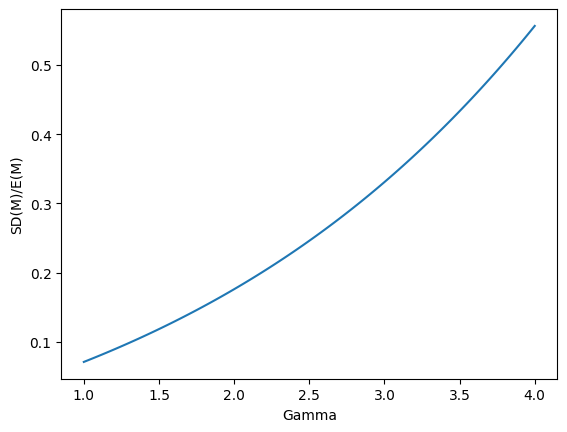

The smallest value of gamma for which SD(M)/E(M) > 0.4 is  3.3636363636363638


In [20]:
MPAP(100000)

### Explain (in words, without using any mathematical  equations or formulas) the economic significance of this result.

According to the Hansen–Jagannathan (H–J) bound, the volatility ratio of pricing kernel cannot be less than the highest sharpe ratio of all possible portfolios. In addition, the pricing kernel has a lower limit of 0 without an upper bound, implying that the probability distribution must be heavily skewed to the right. Based on historical data, the sharpe ratio of US stock market is 0.4 and the standard deviation of consumption growth based on real annual per capita consumption for post-war US economy is approximately 2%. Applying the H-J bound, with the assumption that investor with time separable power utility of consumption and lognormal consumption growth, investor must have a constant relative risk aversion of > 20 which is an unreasonably high. Since the consumption growth is stable but pricing kernel is very volatile, for the H-J bound to hold, investor must have a high degree of risk aversion as risk aversion magnifies the volatility of consumption growth. This results in the equity premium puzzle where it is impossible to generate a equity premium that is large enough unless we assume that investors have an unreasonably high risk aversion. This begs the question of whether investors truly have an unreasonably high risk aversion or the H-J bound doesn’t hold. 

Looking at the assumptions, empirical evidence supports the fact that the probability distribution of the pricing kernel should have a large amount of right skewness which aligns with the assumption that for investor with power utility of consumption, the distribution of the pricing kernel will be right skewed and increases with investor’s relative risk aversion. If we were to maintain the assumption that investors have time separable power utility of consumption, then it could mean that empirical data on post war consumption understates the volatility and skewness of consumption growth (consumption growth is not lognormal). Historical data usually covers time periods without disasters, which makes consumption growth appear less volatile, resulting in the understatement of the negative skewness in consumption growth.

By considering the possibility of rare disasters, such as war, great depression, disease outbreaks etc., which result in the occasional 1/3 fall in consumption growth with the given probability, the volatility and negative skewness of consumption growth increases, causing the distribution to be more left skewed. Therefore, to achieve the same volatility ratio of the pricing kernel, investors' degree of relative risk aversion will be reduced to 3.3, which is reasonable. As a result, the H-J bound is satisfied for relative risk aversion of 3.3, eliminating the equity premium puzzle.

The Hansen–Jagannathan (H-J) bound states that the volatility ratio of the pricing kernel (the ratio of its standard deviation to its mean) must be at least as large as the highest Sharpe ratio of any portfolio. While the market portfolio does not necessarily have the highest Sharpe ratio, the U.S. stock market’s typical Sharpe ratio of 0.4 sets a useful benchmark. This means that the pricing kernel's volatility ratio must also be at least 0.4 to match observed market data.

To meet this requirement, the model implies a risk aversion coefficient (gamma) of 3.4, which reflects a moderate and realistic level of risk aversion for investors. This result aligns with economic intuition when we assume:

Consumption grows at 2% annually with a standard deviation of 2%.

There is a 1.7% probability of rare disasters occurring in any given year, causing a 35% drop in consumption.

This inclusion of rare disasters significantly increases the volatility of consumption growth, introducing negative skewness. Without accounting for rare disasters, consumption growth would appear too stable, and traditional models would require an implausibly high risk aversion (> 20) to explain the observed equity premium—a phenomenon known as the equity premium puzzle​. By incorporating rare, catastrophic events, the model achieves sufficient volatility in the pricing kernel without needing excessive risk aversion, helping resolve the puzzle.

The pricing kernel (or stochastic discount factor) reflects investors' willingness to shift consumption between today and tomorrow, capturing both risk preferences and the value of future consumption. As the intertemporal marginal rate of substitution (IMRS), the pricing kernel has no upper bound but a lower bound at zero, resulting in a right-skewed distribution. Risk-averse investors demand higher compensation for bearing risk, and the volatility of the pricing kernel reflects this premium​.

Even with a gamma of 3.4, a volatility ratio above 0.4 means that the pricing kernel remains quite volatile—its standard deviation is more than 40% of its mean. This high volatility indicates that investors' consumption preferences are highly sensitive to new information, such as unexpected shocks or rare disasters. As a result, asset prices also become more volatile, which is consistent with the behavior of financial markets during periods of uncertainty or crisis​.